# Financial Analysis of Microsoft, Tesla, and Apple
## SEC 10-K Data Analysis (2022-2024)

This notebook analyzes financial data extracted from SEC 10-K filings to identify trends and insights that could inform the development of an AI-powered financial chatbot.

## 1. Import Libraries and Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Set matplotlib style
plt.style.use('ggplot')
%matplotlib inline

## 2. Load Financial Data

**Note**: Make sure you have filled in the `financial_data_template.csv` file with data from SEC 10-K filings.

In [2]:
# Try to load the filled template first, otherwise use sample data
try:
    df = pd.read_csv('financial_data_template.csv')
    # Check if data is filled in
    if df['Total Revenue'].isna().all():
        print("Template is empty. Loading sample data for demonstration...")
        df = pd.read_csv('financial_data_sample.csv')
except:
    print("Loading sample data...")
    df = pd.read_csv('financial_data_sample.csv')

print("Loaded Financial Data:")
print("=" * 80)
df

Template is empty. Loading sample data for demonstration...
Loaded Financial Data:


,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2022,198270,72738,364840,198298,89035
1,Microsoft,2023,211915,72361,411976,205753,87582
2,Microsoft,2024,245122,88136,512163,243686,118291
3,Tesla,2022,53823,5519,62131,26709,7054
4,Tesla,2023,81462,12556,82330,36440,11497
5,Tesla,2024,96773,14997,106618,43015,13643
6,Apple,2022,365817,94680,381191,287912,104038
7,Apple,2023,394328,99803,365725,279414,122151
8,Apple,2024,383285,94749,352755,258549,99829


## 3. Data Preprocessing

In [3]:
# Ensure Year is integer
df['Year'] = df['Year'].astype(int)

# Sort by Company and Year
df = df.sort_values(['Company', 'Year'])
df.reset_index(drop=True, inplace=True)

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Missing Values:
Company                                0
Year                                   0
Total Revenue                          0
Net Income                             0
Total Assets                           0
Total Liabilities                      0
Cash Flow from Operating Activities    0
dtype: int64

Data Types:
Company                                object
Year                                    int64
Total Revenue                           int64
Net Income                              int64
Total Assets                            int64
Total Liabilities                       int64
Cash Flow from Operating Activities     int64
dtype: object


## 4. Calculate Year-over-Year Growth Rates

In [4]:
# Calculate year-over-year growth for each metric
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Total Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Total Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

# Display results
print("Year-over-Year Growth Rates:")
print("=" * 100)
growth_cols = ['Company', 'Year', 'Revenue Growth (%)', 'Net Income Growth (%)', 
               'Cash Flow Growth (%)']
df[growth_cols].round(2)

Year-over-Year Growth Rates:


,Company,Year,Revenue Growth (%),Net Income Growth (%),Cash Flow Growth (%)
0,Apple,2022,NaN,NaN,NaN
1,Apple,2023,7.79,5.41,17.41
2,Apple,2024,-2.80,-5.06,-18.27
3,Microsoft,2022,NaN,NaN,NaN
4,Microsoft,2023,6.88,-0.52,-1.63
5,Microsoft,2024,15.67,21.80,35.06
6,Tesla,2022,NaN,NaN,NaN
7,Tesla,2023,51.35,127.50,62.99
8,Tesla,2024,18.80,19.44,18.67


## 5. Calculate Financial Ratios

In [5]:
# Calculate key financial ratios
df['Profit Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100
df['Asset Turnover'] = df['Total Revenue'] / df['Total Assets']
df['Debt to Assets Ratio'] = df['Total Liabilities'] / df['Total Assets']
df['Cash Flow to Revenue Ratio'] = df['Cash Flow from Operating Activities'] / df['Total Revenue']

# Display ratios
ratio_cols = ['Company', 'Year', 'Profit Margin (%)', 'Asset Turnover', 
              'Debt to Assets Ratio', 'Cash Flow to Revenue Ratio']
print("Financial Ratios:")
print("=" * 80)
df[ratio_cols].round(3)

Financial Ratios:


,Company,Year,Profit Margin (%),Asset Turnover,Debt to Assets Ratio,Cash Flow to Revenue Ratio
0,Apple,2022,25.88,0.96,0.76,0.28
1,Apple,2023,25.31,1.08,0.76,0.31
2,Apple,2024,24.72,1.09,0.73,0.26
3,Microsoft,2022,36.69,0.54,0.54,0.45
4,Microsoft,2023,34.15,0.51,0.50,0.41
5,Microsoft,2024,35.96,0.48,0.48,0.48
6,Tesla,2022,10.25,0.87,0.43,0.13
7,Tesla,2023,15.41,0.99,0.44,0.14
8,Tesla,2024,15.50,0.91,0.40,0.14


## 6. Comparative Analysis

In [6]:
# Calculate average metrics for each company
avg_metrics = df.groupby('Company')[[
    'Total Revenue', 'Net Income', 'Profit Margin (%)', 
    'Cash Flow from Operating Activities'
]].mean()

print("Average Metrics by Company (2022-2024):")
print("=" * 80)
avg_metrics.round(2)

Average Metrics by Company (2022-2024):


,Total Revenue,Net Income,Profit Margin (%),Cash Flow from Operating Activities
Company,,,,
Apple,381143.33,96410.67,25.30,108672.67
Microsoft,218435.67,77745.00,35.60,98302.67
Tesla,77352.67,11024.00,13.72,10731.33


In [7]:
# Calculate Compound Annual Growth Rate (CAGR) for revenue
def calculate_cagr(start_value, end_value, years):
    if start_value > 0:
        return ((end_value / start_value) ** (1 / years) - 1) * 100
    return 0

cagr_results = []
for company in df['Company'].unique():
    company_data = df[df['Company'] == company].sort_values('Year')
    start_revenue = company_data.iloc[0]['Total Revenue']
    end_revenue = company_data.iloc[-1]['Total Revenue']
    cagr = calculate_cagr(start_revenue, end_revenue, 2)
    cagr_results.append({'Company': company, 'Revenue CAGR (%)': cagr})

cagr_df = pd.DataFrame(cagr_results)
print("\nRevenue Compound Annual Growth Rate (2022-2024):")
print("=" * 50)
cagr_df.round(2)


Revenue Compound Annual Growth Rate (2022-2024):


,Company,Revenue CAGR (%)
0,Apple,2.36
1,Microsoft,11.19
2,Tesla,34.09


## 7. Visualize Financial Trends

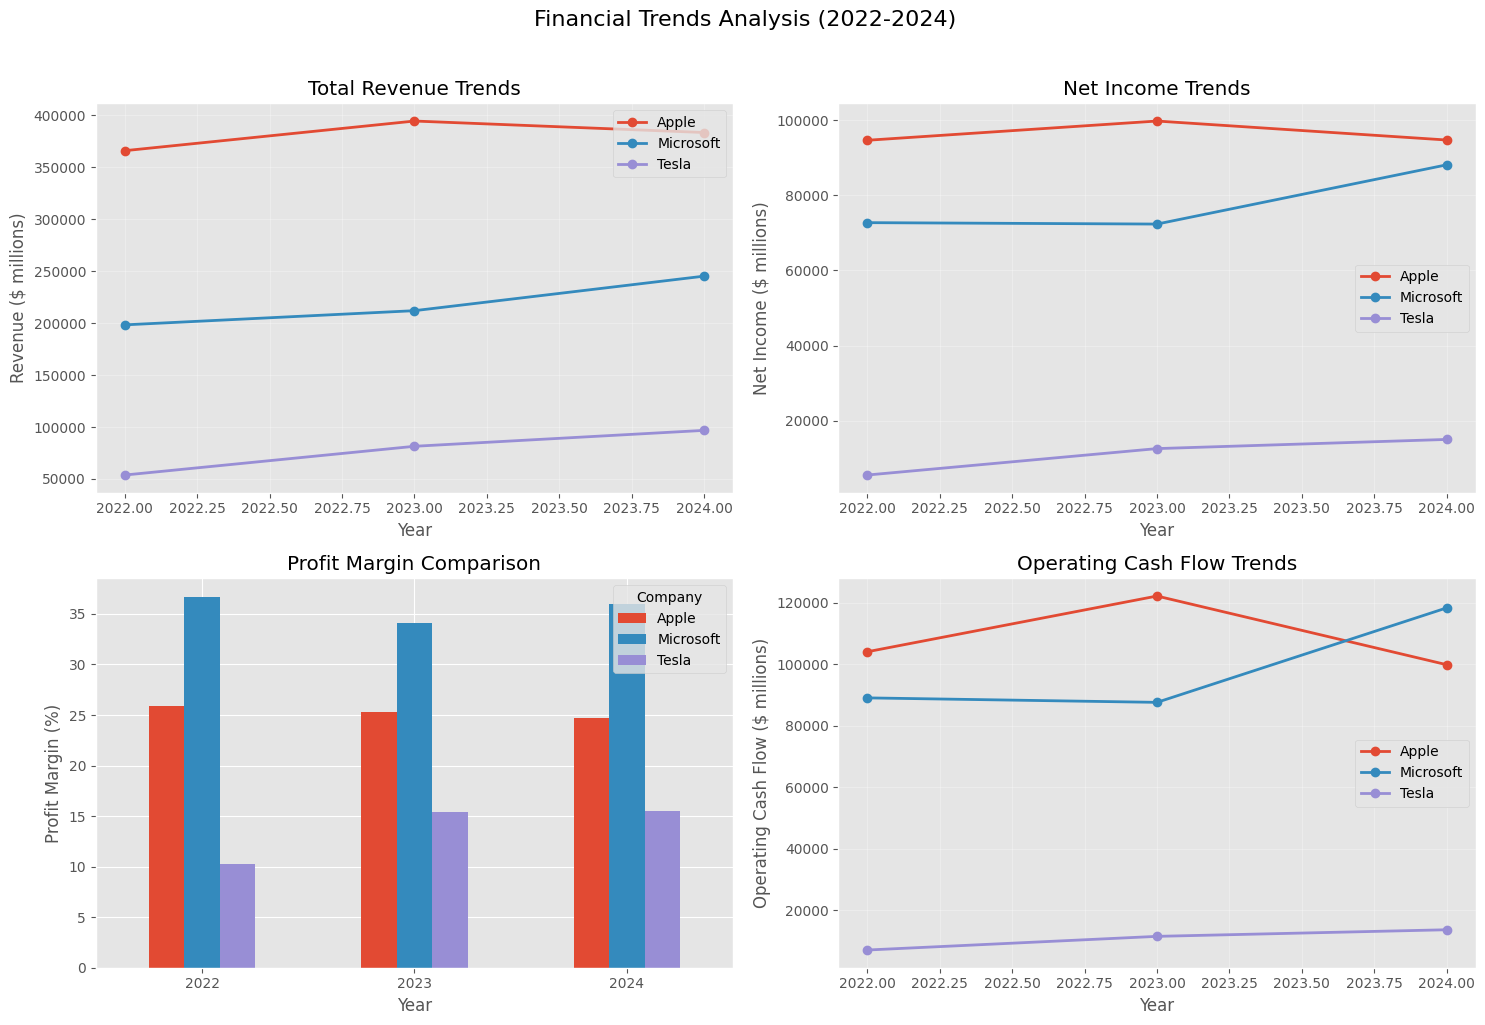

In [8]:
# Create subplots for financial trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Financial Trends Analysis (2022-2024)', fontsize=16, y=1.02)

# 1. Revenue Trends
ax1 = axes[0, 0]
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    ax1.plot(company_data['Year'], company_data['Total Revenue'], 
             marker='o', linewidth=2, label=company)
ax1.set_title('Total Revenue Trends')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue ($ millions)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Net Income Trends
ax2 = axes[0, 1]
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    ax2.plot(company_data['Year'], company_data['Net Income'], 
             marker='o', linewidth=2, label=company)
ax2.set_title('Net Income Trends')
ax2.set_xlabel('Year')
ax2.set_ylabel('Net Income ($ millions)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Profit Margin Comparison
ax3 = axes[1, 0]
profit_pivot = df.pivot(index='Year', columns='Company', values='Profit Margin (%)')
profit_pivot.plot(kind='bar', ax=ax3)
ax3.set_title('Profit Margin Comparison')
ax3.set_xlabel('Year')
ax3.set_ylabel('Profit Margin (%)')
ax3.legend(title='Company')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

# 4. Cash Flow Trends
ax4 = axes[1, 1]
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    ax4.plot(company_data['Year'], company_data['Cash Flow from Operating Activities'], 
             marker='o', linewidth=2, label=company)
ax4.set_title('Operating Cash Flow Trends')
ax4.set_xlabel('Year')
ax4.set_ylabel('Operating Cash Flow ($ millions)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Growth Rate Visualization

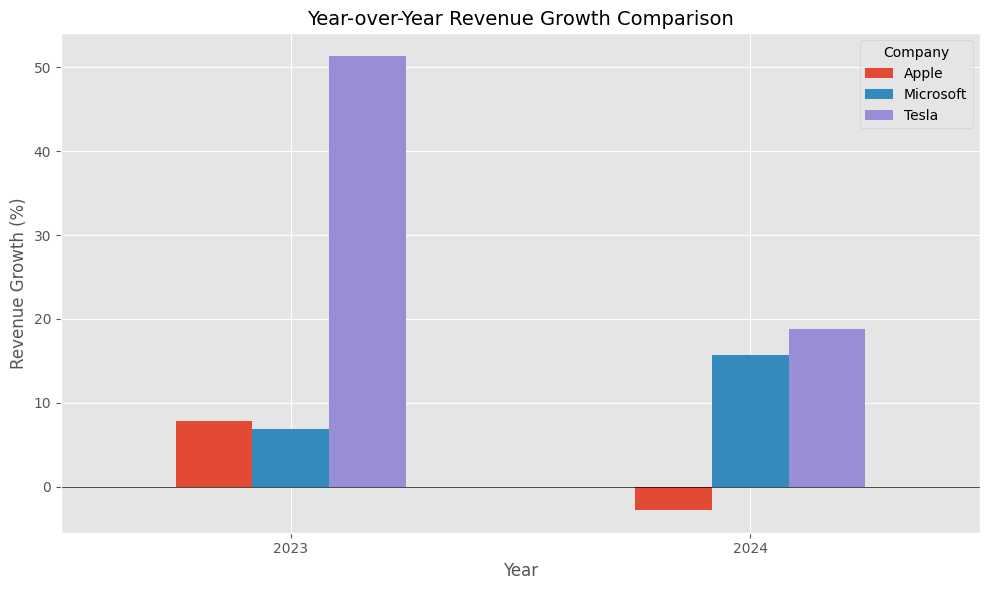

In [9]:
# Visualize year-over-year revenue growth
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Filter data for years with growth rates (exclude 2022)
growth_data = df[df['Year'] > 2022]

# Create grouped bar chart
growth_pivot = growth_data.pivot(index='Year', columns='Company', values='Revenue Growth (%)')
growth_pivot.plot(kind='bar', ax=ax)

ax.set_title('Year-over-Year Revenue Growth Comparison', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Revenue Growth (%)')
ax.legend(title='Company')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## 9. Key Findings Summary

In [10]:
# Generate summary insights
print("KEY FINANCIAL INSIGHTS (2022-2024)")
print("=" * 80)

# 1. Revenue Leaders
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
revenue_leader = latest_data.loc[latest_data['Total Revenue'].idxmax(), 'Company']
print(f"\n1. REVENUE LEADERSHIP:")
print(f"   - {revenue_leader} has the highest revenue in {latest_year}")
print(f"   - Revenue: ${latest_data[latest_data['Company'] == revenue_leader]['Total Revenue'].values[0]:,.0f} million")

# 2. Profitability
print(f"\n2. PROFITABILITY:")
for company in df['Company'].unique():
    avg_margin = df[df['Company'] == company]['Profit Margin (%)'].mean()
    print(f"   - {company}: Average profit margin of {avg_margin:.1f}%")

# 3. Growth Trends
print(f"\n3. GROWTH TRENDS (Revenue CAGR):")
for _, row in cagr_df.iterrows():
    print(f"   - {row['Company']}: {row['Revenue CAGR (%)']:.1f}%")

# 4. Financial Health
print(f"\n4. FINANCIAL HEALTH (Latest Year):")
latest_health = df[df['Year'] == latest_year][['Company', 'Debt to Assets Ratio']]
for _, row in latest_health.iterrows():
    print(f"   - {row['Company']}: Debt-to-Assets ratio of {row['Debt to Assets Ratio']:.2f}")

KEY FINANCIAL INSIGHTS (2022-2024)

1. REVENUE LEADERSHIP:
   - Apple has the highest revenue in 2024
   - Revenue: $383,285 million

2. PROFITABILITY:
   - Apple: Average profit margin of 25.3%
   - Microsoft: Average profit margin of 35.6%
   - Tesla: Average profit margin of 13.7%

3. GROWTH TRENDS (Revenue CAGR):
   - Apple: 2.4%
   - Microsoft: 11.2%
   - Tesla: 34.1%

4. FINANCIAL HEALTH (Latest Year):
   - Apple: Debt-to-Assets ratio of 0.73
   - Microsoft: Debt-to-Assets ratio of 0.48
   - Tesla: Debt-to-Assets ratio of 0.40


## 10. Implications for AI-Powered Financial Chatbot

In [11]:
# Create chatbot feature recommendations
chatbot_features = pd.DataFrame({
    'Feature': [
        'Trend Analysis',
        'Ratio Calculations',
        'Peer Comparison',
        'Growth Metrics',
        'Risk Assessment'
    ],
    'Description': [
        'Track revenue and profit trends over multiple years',
        'Calculate and explain key financial ratios',
        'Compare companies within the same industry',
        'Compute CAGR and year-over-year growth rates',
        'Assess financial health using debt ratios and cash flow'
    ],
    'Example Query': [
        "What is Microsoft's revenue trend over the last 3 years?",
        "What is Apple's profit margin?",
        "How does Tesla compare to other tech companies?",
        "What is the revenue growth rate for Microsoft?",
        "Is Apple financially healthy based on its debt levels?"
    ]
})

print("AI-POWERED FINANCIAL CHATBOT FEATURES")
print("=" * 100)
for _, row in chatbot_features.iterrows():
    print(f"\n{row['Feature'].upper()}:")
    print(f"Description: {row['Description']}")
    print(f"Example Query: '{row['Example Query']}'")

AI-POWERED FINANCIAL CHATBOT FEATURES

TREND ANALYSIS:
Description: Track revenue and profit trends over multiple years
Example Query: 'What is Microsoft's revenue trend over the last 3 years?'

RATIO CALCULATIONS:
Description: Calculate and explain key financial ratios
Example Query: 'What is Apple's profit margin?'

PEER COMPARISON:
Description: Compare companies within the same industry
Example Query: 'How does Tesla compare to other tech companies?'

GROWTH METRICS:
Description: Compute CAGR and year-over-year growth rates
Example Query: 'What is the revenue growth rate for Microsoft?'

RISK ASSESSMENT:
Description: Assess financial health using debt ratios and cash flow
Example Query: 'Is Apple financially healthy based on its debt levels?'


## 11. Export Results

In [12]:
# Export analysis results to Excel
with pd.ExcelWriter('financial_analysis_results.xlsx', engine='openpyxl') as writer:
    # Complete dataset
    df.to_excel(writer, sheet_name='Complete Data', index=False)
    
    # Summary metrics
    avg_metrics.to_excel(writer, sheet_name='Average Metrics')
    
    # CAGR analysis
    cagr_df.to_excel(writer, sheet_name='CAGR Analysis', index=False)
    
    # Chatbot features
    chatbot_features.to_excel(writer, sheet_name='Chatbot Features', index=False)

print("Analysis results exported to 'financial_analysis_results.xlsx'")

Analysis results exported to 'financial_analysis_results.xlsx'


## Conclusion

This analysis demonstrates how to systematically analyze financial data from SEC 10-K filings using pandas. The insights generated can inform the development of an AI-powered financial chatbot capable of:

1. **Answering trend-based questions** about company performance
2. **Calculating financial ratios** for quick assessments
3. **Providing comparative analysis** between companies
4. **Identifying growth patterns** and risks
5. **Offering data-driven insights** for investment decisions

The pandas framework used here can be integrated into a chatbot backend for real-time analysis.